# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import Gridingtons as grid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from WhatisLife import Rotator

In [63]:
%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

In [3]:
def ScreamExtractor(File, Sep=','):
    FILENAME = pd.read_csv(f'{File}', sep=Sep, comment='#')
    return FILENAME

In [47]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets'
HoVanData = ScreamExtractor(f'{Directory}/Sorted Data/Planets/HoVan All Planets.csv')
GaiaDatat = ScreamExtractor(f'{Directory}/BASTA/Input/Gaia.txt', '\t')
GaiaData2t = ScreamExtractor(f'{Directory}/Sorted Data/Stars/Gaia All Stars.csv')
BASTAData = ScreamExtractor(f'{Directory}/BASTA/Output/Gaia/GaiaResults.ascii', ' ')
#BASTAData = ScreamExtractor(f'{Directory}/BASTA/Output/GaiaBaSTI/GaiaBaSTIResults.ascii', ' ')
ExoData = ScreamExtractor(f'{Directory}/Sorted Data/Planets/Exo All Planets.csv')

In [48]:
Object = HoVanData
for f in range(len(Object)):
    if str(Object['Host Gaia DR3 ID'][f]) == 'nan':
        HoVanData = HoVanData.drop(f)
Object = BASTAData
for f in range(len(Object)):
    if str(Object['radPhot'][f]) == 'nan':
        BASTAData = BASTAData.drop(f)

In [49]:
GaiaData = pd.DataFrame()
GaiaData2 = pd.DataFrame()
for g in range(len(BASTAData)):
    try:
        Line = GaiaDatat[GaiaDatat['ID'] == BASTAData['starid'][g]]
        GaiaData = pd.concat([GaiaData, Line], ignore_index=True)
    except:
        continue

    try:
        Line = GaiaData2t[GaiaData2t['Gaia DR3 ID'] == BASTAData['starid'][g]]
        GaiaData2 = pd.concat([GaiaData2, Line], ignore_index=True)
    except:
        continue
del GaiaDatat, GaiaData2t

In [ ]:
def PlanetRadiusErrors(Ratio, Radius, RatioError, RadiusError):
    Error = np.sqrt((Ratio*RadiusError)**2 + (Radius*RatioError)**2)*const.R_sun/const.R_earth
    return Error

In [ ]:
def PlanetRadiusFinder(Planets, Stars, BASTAfication='Post'):
    if BASTAfication == 'Pre':
        ID = 'Gaia DR3 ID'
        Radii = 'Radius'
        Radiierrp = 'Rad pe'
        Radiierrm = 'Rad me'
    else:
        ID = 'starid'
        Radii = 'radPhot'
        Radiierrp = 'radPhot_errp'
        Radiierrm = 'radPhot_errm'
    
    Period = []
    PlanetRadius = []
    PlanetRadiuserrp = []
    PlanetRadiuserrm = []
    for n in range(len(Planets)):
        try:
            Index = Stars[Stars[ID] == Planets['Host Gaia DR3 ID'][n]].index[0]
            Radius = Planets['PSR'][n]*Stars[Radii][Index]*const.R_sun/const.R_earth
            if Radius < 5:
                Period.append(Planets['P'][n])
                PlanetRadius.append(Radius)

                PlanetRadiuserrp.append(PlanetRadiusErrors(Planets['PSR'][n], Stars[Radii][Index],
                                                           Planets['PSR pme'][n], Stars[Radiierrp][Index]))
                PlanetRadiuserrm.append(PlanetRadiusErrors(Planets['PSR'][n], Stars[Radii][Index],
                                                           Planets['PSR pme'][n], Stars[Radiierrm][Index]))
        except:
            continue
    return Period, PlanetRadius, [PlanetRadiuserrp, PlanetRadiuserrm]

In [ ]:
PeriodBASTA, RadiusBASTA, RadiusBASTAerr = PlanetRadiusFinder(HoVanData, BASTAData)
PeriodGaia, RadiusGaia, RadiusGaiaerr = PlanetRadiusFinder(HoVanData, GaiaData2, 'Pre')

In [ ]:
def Gradienter(XAxis, YAxis, m, X=10):
    NewX = np.linspace(10, 10, len(XAxis))
    NewY = 10**(m*(X-XAxis)+YAxis)
    return NewX, NewY

In [ ]:
Title = 'Radius Valley plot for Gaia Stars and VanHo Planets'
'''
plt.figure()
plt.errorbar(PeriodGaia, RadiusGaia, yerr=RadiusGaiaerr,
             fmt='.', color=Colour, elinewidth=0.5, capsize=0.5, markersize=2, label='Gaia')
plt.errorbar(PeriodBASTA, RadiusBASTA, yerr=RadiusBASTAerr,
             fmt='.', color=Colour, elinewidth=0.5, capsize=0.5, markersize=2, label='BASTA (Gaia)')
plt.xscale('log')
plt.xlabel('log(Orbital Period/Days)', fontsize=12)
plt.ylabel('$R/R_{\oplus}$', fontsize=12)
plt.title(Title, fontsize=15)
plt.legend()
plt.show()
'''
ax = sns.jointplot(x=np.log10(PeriodGaia), y=np.array(RadiusGaia), joint_kws={'s':10}, marginal_kws=dict(bins=26, fill=True))
ax = sns.jointplot(x=np.log10(PeriodBASTA), y=np.array(RadiusBASTA), joint_kws={'s':10}, marginal_kws=dict(bins=26, fill=True))
plt.show()

In [ ]:
x = np.linspace(min(OrbitalPeriodList), max(OrbitalPeriodList), 2)
m = -0.11
c1 = 0.37
y1 = 10**(m*np.log10(x) + c1)

In [ ]:
plt.figure()
plt.plot(OrbitalPeriodList, PlanetRadius, '.', markersize=2)
plt.plot(x, y1, label='Radius Valley (VanHo)')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from HoVan and stellar data from Gaia', fontsize=12)
plt.xscale('log')
plt.legend()
plt.show()

In [40]:
np.median(BASTAData['age'])

6499.703142750001

In [50]:
SolarTemp = 5772
def LuminosityErrors(Radius, Teff, RadiusError, TeffError):
    Error = 4*Radius**2*Teff**6/SolarTemp**8*(Teff**2*RadiusError**2 + 4*Radius**2*TeffError**2)
    return Error

In [51]:
GaiaData2['Rad pe'] += 0.035*GaiaData2['Radius']
GaiaData2['Rad me'] += 0.035*GaiaData2['Radius']

In [52]:
LuminosityGaia = GaiaData2['Radius']**2*(GaiaData2['Teff']/SolarTemp)**4
LuminosityBASTA = BASTAData['radPhot']**2*(BASTAData['Teff']/SolarTemp)**4
LuminosityGaiaerrp = LuminosityErrors(GaiaData2['Radius'], GaiaData['Teff'], 
                                       GaiaData2['Rad pe'], GaiaData['Teff-err-new'])
LuminosityGaiaerrm = LuminosityErrors(GaiaData2['Radius'], GaiaData['Teff'], 
                                       GaiaData2['Rad me'], GaiaData['Teff-err-new'])
LuminosityBASTAerrp = LuminosityErrors(BASTAData['radPhot'], BASTAData['Teff'], 
                                       BASTAData['radPhot_errp'], BASTAData['Teff_errp'])
LuminosityBASTAerrm = LuminosityErrors(BASTAData['radPhot'], BASTAData['Teff'], 
                                       BASTAData['radPhot_errm'], BASTAData['Teff_errm'])

<IPython.core.display.Javascript object>


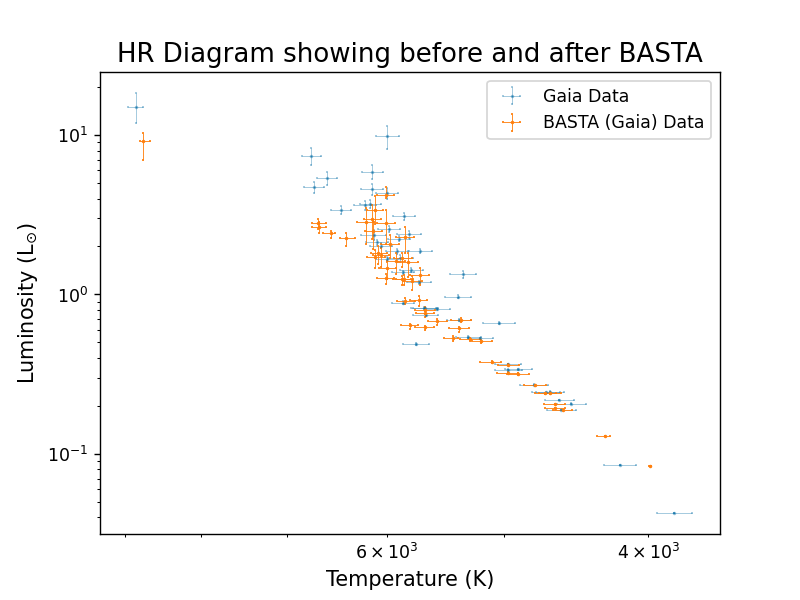

In [64]:
Title = 'HR Diagram showing before and after BASTA'

plt.figure()
plt.errorbar(GaiaData2['Teff'], LuminosityGaia, xerr=GaiaData['Teff-err-new'],
             yerr=[LuminosityGaiaerrp, LuminosityGaiaerrm], fmt='.', color=Colour,
             elinewidth=0.5, capsize=0.5, markersize=2, label='Gaia Data', alpha=0.4)
plt.errorbar(BASTAData['Teff'], LuminosityBASTA, xerr=[BASTAData['Teff_errp'], BASTAData['Teff_errm']],
             yerr=[LuminosityBASTAerrp, LuminosityBASTAerrm], fmt='.', color=Colour,
             elinewidth=0.5, capsize=0.5, markersize=2, label='BASTA (Gaia) Data', alpha=1)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Luminosity (L$_{\odot}$)', fontsize=12)
plt.title(Title, fontsize=15)
#plt.xlim(8000, 4000)
#plt.ylim(0.02, 20)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Money Plots/49 Stars - {Title}')

<IPython.core.display.Javascript object>


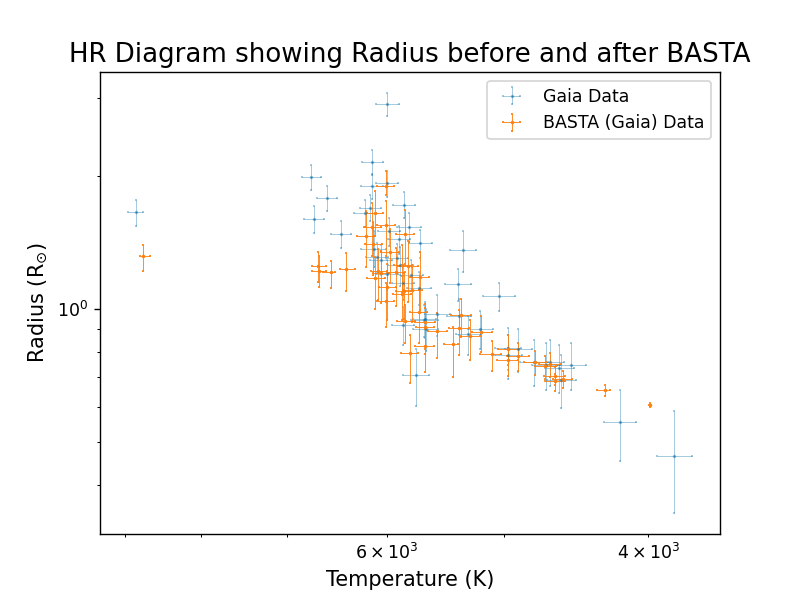

In [66]:
Title = 'HR Diagram showing Radius before and after BASTA'

plt.figure()
plt.errorbar(GaiaData2['Teff'], GaiaData2['Radius'], xerr=GaiaData['Teff-err-new'],
             yerr=[GaiaData2['Rad pe']+0.035/GaiaData2['Radius'], GaiaData2['Rad me']+0.035/GaiaData2['Radius']],
             fmt='.', color=Colour, elinewidth=0.5, capsize=0.5, markersize=2, label='Gaia Data', alpha=0.4)
plt.errorbar(BASTAData['Teff'], BASTAData['radPhot'], xerr=[BASTAData['Teff_errp'], BASTAData['Teff_errm']],
             yerr=[BASTAData['radPhot_errp'], BASTAData['radPhot_errm']], fmt='.', color=Colour,
             elinewidth=0.5, capsize=0.5, markersize=2, label='BASTA (Gaia) Data', alpha=1)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Radius (R$_{\odot}$)', fontsize=12)
plt.title(Title, fontsize=15)
#plt.xlim(8000, 4000)
#plt.ylim(0.02, 20)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Money Plots/49 - {Title}')

In [39]:
np.median(BASTAData['radPhot'])

1.2126424538610627

<IPython.core.display.Javascript object>


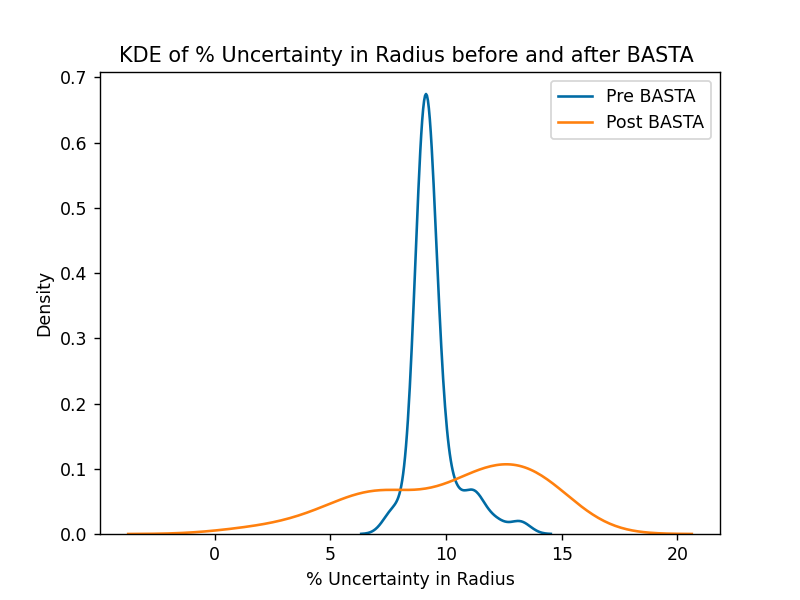

In [67]:
PercentageError1 = (GaiaData2['Rad pe']+GaiaData2['Rad me'])/2/GaiaData2['Radius']*100+3.5
PercentageError2 = (BASTAData['radPhot_errp']+BASTAData['radPhot_errm'])/2/BASTAData['radPhot']*100

Title = r'KDE of % Uncertainty in Radius before and after BASTA '
plt.figure()
ax = sns.kdeplot(data=PercentageError1, label='Pre BASTA')
sns.kdeplot(data=PercentageError2, label='Post BASTA')
plt.xlabel(r'% Uncertainty in Radius')
plt.title(Title)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Money Plots/49 Stars - {Title}')

<IPython.core.display.Javascript object>


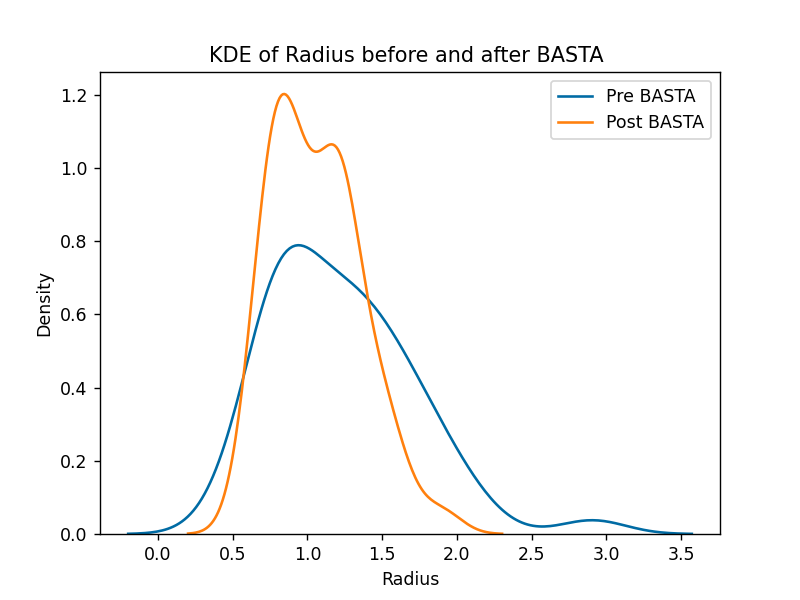

In [68]:
Title = r'KDE of Radius before and after BASTA '
plt.figure()
ax = sns.kdeplot(data=GaiaData2['Radius'], label='Pre BASTA')
sns.kdeplot(data=BASTAData['radPhot'], label='Post BASTA')
plt.xlabel(r'Radius')
plt.title(Title)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Money Plots/49 Stars - {Title}')

In [56]:
BASTAData

,starid,Teff,Teff_errp,Teff_errm,FeH,FeH_errp,FeH_errm,radPhot,radPhot_errp,radPhot_errm,...,age,age_errp,age_errm,numax,numax_errp,numax_errm,dnuscal,dnuscal_errp,dnuscal_errm,Unnamed: 22
1,1074139748425931008,5349.174663,87.223632,77.484527,0.275680,0.096954,1.225948e-01,0.969426,0.106109,0.086316,...,6900.401544,5710.902147,4657.441661,3350.114163,557.500388,649.949580,140.336836,17.858470,20.503075,NaN
2,1076970406751899008,6385.422385,87.940754,65.335894,-0.133009,0.104040,1.115448e-01,1.230778,0.133969,0.104679,...,2362.948775,1152.966195,1307.460236,2196.387041,401.248800,388.848646,105.412921,14.387365,14.613504,NaN
3,1111639314047794944,6051.716894,77.888559,76.043077,-0.049694,0.114772,1.236273e-01,1.208575,0.175950,0.144464,...,4910.259919,1844.410775,2133.246560,2186.947864,581.255113,474.629624,104.714094,20.584868,18.082391,NaN
4,111322601672419712,5092.781132,67.237000,94.938839,-0.123818,0.133696,1.284966e-01,0.789885,0.065939,0.057587,...,13969.466380,4509.072290,7429.086157,4017.834343,613.311809,479.042047,167.816080,19.134061,15.947862,NaN
5,1117620107545810944,5858.618700,87.911781,73.675215,0.227325,0.100325,1.063863e-01,1.258857,0.164709,0.138064,...,5183.752397,1740.813487,2131.384540,2167.810427,534.381219,460.680292,101.312181,18.467863,16.735423,NaN
6,1255520718461480960,5701.009721,80.393170,84.670380,-0.029045,0.129736,1.331497e-01,1.183520,0.190861,0.158031,...,10012.242400,2816.319330,2955.198816,2098.823574,646.618731,494.586388,102.065994,23.036479,19.027628,NaN
7,1316708918505350528,5826.733551,82.825201,74.757461,-0.060362,0.120669,1.288250e-01,0.939314,0.100054,0.083033,...,3512.607799,3460.809142,2443.205616,3348.571834,494.161606,572.000315,145.493231,17.418520,19.138175,NaN
8,1331356474971716992,5967.737727,82.339168,84.691112,-0.002154,0.112477,1.190001e-01,1.345242,0.198637,0.174250,...,6153.512059,1625.639007,1663.131536,1798.098417,517.128209,410.366466,89.634859,19.258139,16.066822,NaN
9,1344163891352965632,6006.045487,75.751192,81.600293,-0.243683,0.111731,1.235344e-01,1.897964,0.084414,0.150108,...,5890.544729,938.610118,780.860356,913.073986,140.409435,66.960755,53.752615,6.425245,2.987638,NaN
10,1416731285125373184,6131.231406,84.591972,76.822172,-0.054773,0.105077,1.140874e-01,1.403108,0.210103,0.168726,...,4829.744855,1134.442593,1270.974303,1697.678825,450.569178,398.506049,85.870268,17.061769,15.780243,NaN


You tatty git